## CAPSTONE PROJECT 3

****

## Bussiness problem understanding

**Context**

Daegu merupakan salah satu kota besar di Korea Selatan yang terkenal sebagai pusat industri tekstil nasional serta rumah bagi peninggalan sejarah modern Korea. Daegu juga memiliki pasar yang aktif dengan pusat perbelanjaan besar, yang turut menarik banyak penduduk untuk tinggal di kota ini. Daegu memiliki sejumlah pemandangan indah dan pegunungan yang indah terutama selama musim gugur dan musim semi. Populasi Daegu cenderung homogen dengan sedikit imigran. Tetapi Daegu merupakan kota yang cocok ditinggali oleh ekpatriat atau imigran dari luar negeri karena restoran dan bar di daerah tersebut cenderung menggabungkan pengaruh dalam dan luar negeri. 

Banyaknya populasi di Daegu membuat penduduk disana membutuhkan tempat tinggal seperti apartemen. Umumnya penyewa mencari apartemen dengan kriteria tertentu sesuai kebutuhan mereka, misalnya tipe kamarnya, fasilitas yang dimiliki apartemen tersebut, dan fasilitas umum di sekitar apartemen. Pasar real estat di Daegu cenderung kompetitif dengan banyak proyek pembangunan baru yang menambah persediaan apartemen. Pemilik apartemen dapat meningkatkan fasilitas yang ada di apartemen tersebut sesuai dengan permintaan yang paling dicari dari para penyewa. Permintaan terhadap apartemen di lokasi strategis dengan fasilitas lengkap terus meningkat, terutama di sekitar pusat bisnis dan kawasan industri.Banyaknya apertemen yang ada di Daegu membuat tingginya persaingan antar penyewa atau pemilik apartemen. Maka dari itu pemilik apartemen harus memahami faktor apa saja yang mempengaruhi harga penyewaan agar mendapatkan profit maksimal serta mengetahui harga pasaran dengan fasilitas yang dimiliki.

**Problem Statement**

Pemilik apartemen perlu memiliki model bisnis untuk memprediksi harga jual apartemen di Daegu. Harga apartemen yang akan dikenakan ke para pembeli unit apartemen tersebut dapat disesuaikan dengan fasilitas yang dimiliki serta fasilitas umum disekitarnya. Model bisnis yang efektif dapat meningkatkan keuntungan dan menyesuaikan harga jual sesuai dengan permintaan pasar. Pemilik apartemen perlu mengambangkan strategi penetapan harga berdasarkan hasil analisis dan model prediksi yang kuat dengan memperyimbangkan kondisi internal unit dan fasilitas umum disekitar serta dinamika permintaan pasar yang berkembang.


**Goals**

Berdasarkan permasalahan tersebut pemilik apartemen dapat menentukan harga jual yang optimal, sehingga dapat memaksimalkan profit bagi pemilik apartemen. Pemilik juga dapat menyesuaikan tipe apartemen yang akan dibangun di masa depan berdasarkan prediksi permintaan pasar dan harga jual yang optimal. Dengan model bisnis yang efektif berdasarkan prediksi harga jual yang akurat, pemilik apartemen dapat meningkatkan revenue dan daya saing di pasar properti.

**Analytics Approach**

Berdasarkan permasalahan tersebut, pemilik apartemen di Daegu tentu perlu memiliki 'tool' yang dapat memprediksi serta membantu mereka untuk dapat menentukan harga jual properti yang tepat untuk tiap apartemen yang baru akan mereka jual. Adanya perbedaan pada berbagai fitur yang terdapat pada suatu apartemen, seperti jumlah kamar, fasilitas yang dimiliki, dan fasilitas umum di sekitar apartemen, dapat menambah keakuratan prediksi harga jual, yang mana dapat mendatangkan profit bagi pemilik apartemen, dan juga tetap kompetitif bagi pembeli.

**Metrics Evaluation**
Evaluation metrics yang akan digunakan adalah R-Squared, MAE, MSE, dan RMSE. R-squared memberikan gambaran seberapa baik model menjelaskan variabilitas data. MAE adalah rataan nilai absolut error antara nilai prediksi dan nilai aktual. MSE adalah raraan dari kuadrat error antara nilai prediksi dan nilai aktual. RMSE adalah akar kuadrart dari MSE yang memberikan ukuran kesalahan dalam satuan yang sama dengan variabel target. Semakin kecil nilai MAE, MSE, dan RMSE maka model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

### **Data Understanding**

- Data set merupakan data listing Apartemen di Daegu, Korea Selatan
- Setiap baris mempresentasikan informasi terkait unit apartemen tersebut beserta harganya

**Attributes Information**
| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| HallwayType | Object | Apartment type |
| TimeToSubway | Object | Time needed to the nearest subway station |
| SubwayStation | object | The name of the nearest subway station |
| N_FacilitiesNearBy(ETC) | integer | The number of facilities nearby |
| N_FacilitiesNearBy(PublicOffice) | integer | The number of public office facilities nearby |
| N_SchoolNearBy(University) | integer | The number of universities nearby |
| N_Parkinglot(Basement) | integer | The number of the parking lot |
| YearBuilt | integer | The year the apartment was built |
| N_FacilitiesInApt | integer | Number of facilities in the apartment |
| Size(sqft): | integer | The apartment size (in square feet) |
| SalePrice | integer | The apartment size (in square feet) |


In [1]:
## import library yang dibutuhkan
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

In [85]:
## Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


### **Exploratory Data Analysis**

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


pada dataset ini, terdapat 10 kolom dengan 4123 baris

In [87]:
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

tidak terdapat data kosong atau missing value, sehingga kita tidak perlu menghapus atau mengganti data yang hilang

Text(0.5, 1.0, 'Price Distribution Plot')

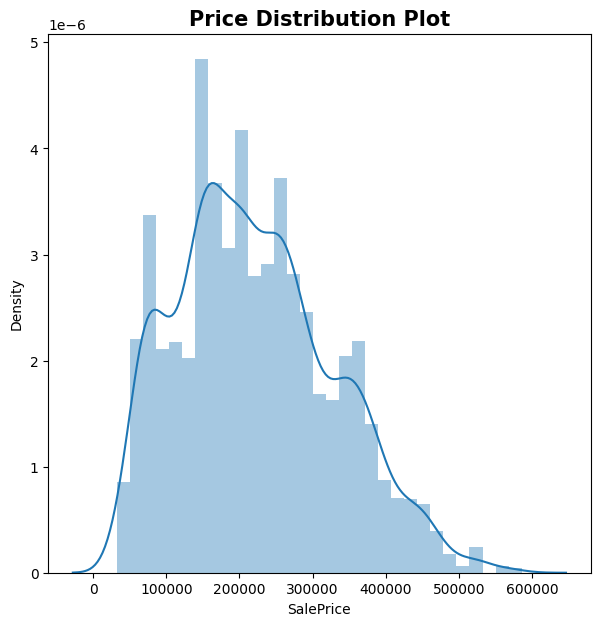

In [88]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold')

Berdasarkan plot distribusi harga jual apartemen di Daegu, data harga jual menunjukkan distribusi yang sedikit skew ke kanan, dengan beberapa harga jual yang sangat tinggi. Ada beberapa titik di ujung kanan histogram yang mungkin merupakan outliers. Maka dari itu, kita akan coba lihat outliers di setiap kolom.

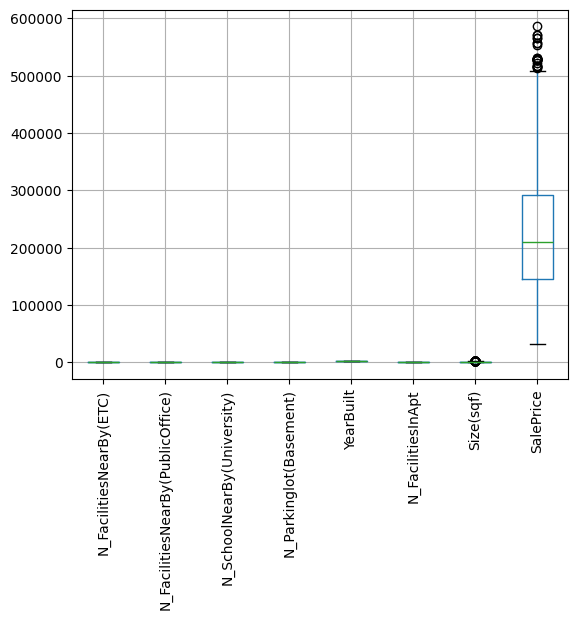

In [89]:
df.boxplot(rot=90)
plt.show()

Terdapat outliers di kolom **Size(sqf)** dan **SalePrice** . Kita akan cek dan tangani outliers tersebut

In [97]:
# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = np.percentile(df['Size(sqf)'], 25)
Q3 = np.percentile(df['Size(sqf)'], 75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound_Size = Q1 - 1.5 * IQR
upper_bound_Size = Q3 + 1.5 * IQR

# Deteksi outliers
outliers = (df['Size(sqf)'] < lower_bound_Size) | (df['Size(sqf)'] > upper_bound_Size)
display(lower_bound_Size, upper_bound_Size)

-86.5

1861.5

In [98]:
# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = np.percentile(df['SalePrice'], 25)
Q3 = np.percentile(df['SalePrice'], 75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

# Deteksi outliers
outliers = (df['SalePrice'] < lower_bound_price) | (df['SalePrice'] > upper_bound_price)
display(lower_bound_price, upper_bound_price)

-70355.0

499557.0

In [99]:
df = df[(df['Size(sqf)'] >= lower_bound_Size) & (df['Size(sqf)'] <= upper_bound_Size)]

In [100]:
df = df[(df['SalePrice'] >= lower_bound_price) & (df['SalePrice'] <= upper_bound_price)]

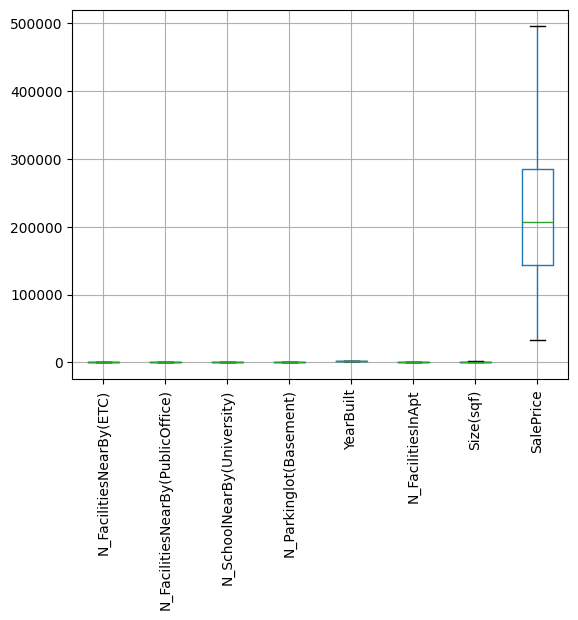

In [101]:
df.boxplot(rot=90)
plt.show()

jumlah properti berdasarkan tipe kamar dan tahun pembuatan

In [102]:
print(f"Jumlah properti berdasarkan tipe kamar:\n{df['HallwayType'].value_counts()}")
print(f"\nJumlah properti berdasarkan tahun pembuatan:\n{df['YearBuilt'].value_counts()}")

Jumlah properti berdasarkan tipe kamar:
HallwayType
terraced    2446
mixed       1102
corridor     464
Name: count, dtype: int64

Jumlah properti berdasarkan tahun pembuatan:
YearBuilt
2007    807
2005    502
2006    433
1993    422
1992    326
2013    322
2014    291
1986    265
2008    203
2009    171
2015     92
1997     67
1985     51
1978     49
2003      7
1980      4
Name: count, dtype: int64


Apartemen dengan tipe terraced memiliki jumlah yang paling banyak. Berdasarkan data tersebut dapat dilihat jumlah apartemen semakin banyak seiring bertambahnya tahun. Dapat disimpulkan bahwa peminat untuk memiliki apartemen di Daegu terus meningkat.

In [103]:
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504


**Drop Columns**

Pada analisis ini, kami memilih kolom fitur yang dibutuhkan berdasarkan domain knowledge. Kolom yang dirasa tidak relevan akan dihapus. Kolom **SubwayStation** dirasa tidak memiliki relevansi dan kepentingan untuk analisis prediktif. Kolom **N_FacilitiesNearBy(ETC)** juga akan dihapus karena fasilitas lain yang ada di kolom ini tidak jelas dan bukan termasuk fasilitas yang penting untuk menjadi alasan pemilihan lokasi apartemen.

In [104]:
df = df.drop(columns=['SubwayStation','N_FacilitiesNearBy(ETC)'])

In [105]:
df.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,5,1,0,1986,4,914,150442
2,mixed,15min~20min,7,3,56,1997,5,558,61946
3,mixed,5min~10min,5,4,798,2005,7,914,165486
4,terraced,0-5min,1,2,536,2006,5,1743,311504


Sekarang kolom SubwayStation dan N_FacilitiesNearBy(ETC) sudah terhapus.

**Data Correlation**

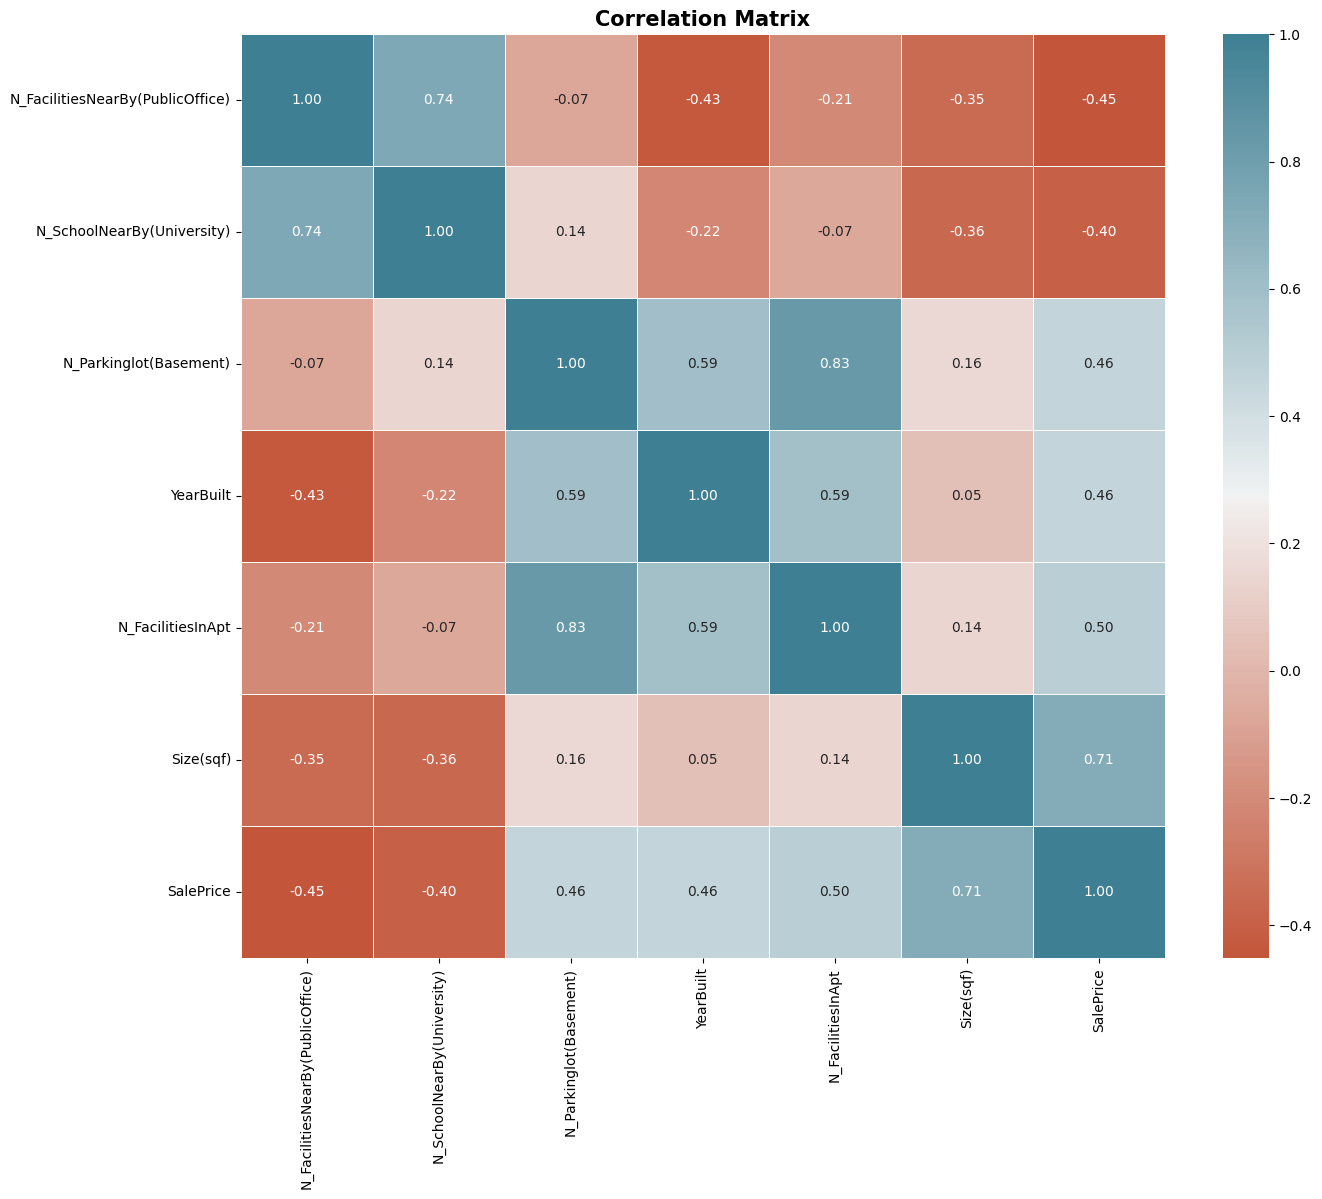

In [106]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df.corr(method='pearson', numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Berdasarkan matriks korelasi antara kolom target yaitu **SalePrice** nilai berada diantara -0.40 sampai dengan 0.71. Korelasi negatif menandakan bahwa ada hubungan terbalik antara fitur tersebut dengan target. Fitur yang paling tinggi nilai korelasinya adalah kolom Size(sqf) yang berarti semakin besar ukuran apartemen tersebut maka semakin tinggi nilai jualnya. Kolom dengan korelasi negatif dan positif pada analisis ini akan digunakan keseluruhan untuk menjadi kolom fitur. 

**Clean Dataset**

In [107]:
## cek data yang sudah bersih
df.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,5,1,0,1986,4,914,150442
2,mixed,15min~20min,7,3,56,1997,5,558,61946
3,mixed,5min~10min,5,4,798,2005,7,914,165486
4,terraced,0-5min,1,2,536,2006,5,1743,311504


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4012 entries, 0 to 4122
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4012 non-null   object
 1   TimeToSubway                      4012 non-null   object
 2   N_FacilitiesNearBy(PublicOffice)  4012 non-null   int64 
 3   N_SchoolNearBy(University)        4012 non-null   int64 
 4   N_Parkinglot(Basement)            4012 non-null   int64 
 5   YearBuilt                         4012 non-null   int64 
 6   N_FacilitiesInApt                 4012 non-null   int64 
 7   Size(sqf)                         4012 non-null   int64 
 8   SalePrice                         4012 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 313.4+ KB


Setelah data sudah bersih kita akan masuk ke tahap modeling

**Modeling**

Agar dapat menggunakan semua fitur, data kategorikal harus diubah menjadi data numerik. Pada analisis ini kita menggunakan One Hot Encoding untuk mengubah kolom HallwayType dan TImeToSubway.

In [109]:
df = pd.get_dummies(df, columns=['HallwayType'], dtype='int32')

In [110]:
df = pd.get_dummies(df, columns=['TimeToSubway'], dtype='int32')

**Data Splitting**

In [111]:
# Memisahkan data independen variabel dengan target
X = df.drop(['SalePrice'], axis=1)
y = df['SalePrice']

**Train and Test Splitting**

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 999)

**Choose a Benchmark Model**

Pada analisis ini kita akan menggunakan beberapa model yaitu :
- Linear regression
- Decision Tree

Linear Regression

In [113]:
Model = linear_model.LinearRegression()

In [114]:
Model.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = Model.predict(X_test)

In [116]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [117]:
data = { 
    'Linear Regresi' : [r2, mae, mse, rmse]
}

In [118]:
eva_metrics = pd.DataFrame(data, index=['R squared', 'MAE', 'MSE', 'RMSE'])
eva_metrics

,Linear Regresi
R squared,7.557487e-01
MAE,4.379086e+04
MSE,2.767196e+09
RMSE,5.260414e+04


In [119]:
meanPrice = df['SalePrice'].mean()

In [120]:
PersenKesalahan = (mae/meanPrice)*100
PersenKesalahan

20.148915245713493

Nilai R-squared 0.755 menunjukkan bahwa sekitar 75.57% variasi dalam harga apartemen dapat dijelaskan oleh model regresi ini. Nilai MAE nya adalah 43.790, nilai MSE nya 2.767.196.000, nilai RMSE nya 52.640. Semakin kecil nilai MAE, MSE, dan RMSE maka semakin baik performa model yang dibuat. 

Dari hasil MAE kita dapat melihat presentasi kesalahan dari model ini. Dari perbandingan antara MAE dengan hasil mean dari harga unit apartemen dikalikan 100. Hasil persentase kesalahan dari MAE dengan model linear regression adalah 20,15% yang menunjukkan bahwa rata-rata kesalahan prediksinya adalah 20,15% dari harga apartemen rata-rata. Persentase kesahan tersebut masih bisa dikurangi dengan mencoba model lain dan melakukan tuning hyperparameter.


Selanjutkan kita coba menggunakan model Decision Tree Regression

Decision Tree Regression

In [121]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [122]:
y_pred_dt = dt_model.predict(X_test)

In [123]:
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

In [124]:
eva_metrics['DecisionTree'] = [r2_dt, mae_dt, mse_dt, rmse_dt]
eva_metrics

,Linear Regresi,DecisionTree
R squared,7.557487e-01,8.471544e-01
MAE,4.379086e+04,3.281398e+04
MSE,2.767196e+09,1.731634e+09
RMSE,5.260414e+04,4.161290e+04


Dengan menggunakan model decision tree, nilai R-square meningkat dari 0,76 menjadi 0,85. Nilai MAE, MSE dan RMSE juga berkurang daripada model sebelumnya. Nilai tersebut menunjukkan model ini lebih akurat dan memiliki kesalahan prediksi yang lebih kecil.

Selanjutnya kita akan coba menggunakan Tuning Hyperparameter untuk mengoptimalkan model machine learning ini. Parameter yang akan ditentukan sebelum proses pelatihan data. Pada analisis ini kita akan menggunakan metode Grid Search dengan menentukan hyperparameter dan nilai nilainya. 

Polynomial features  

In [125]:
# Buat pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
     ])

In [126]:
# Menentukan hyperparameter dan nilai nilainya
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5],
}

In [127]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)


In [128]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('linear', LinearRegression())]),
             n_jobs=-1, param_grid={'poly__degree': [1, 2, 3, 4, 5]},
             verbose=2)

In [131]:
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'poly__degree': 2}


In [132]:
y_pred_PF = grid_search.predict(X_test)

In [133]:
r2_PF = r2_score(y_test, y_pred_PF)
mae_PF = mean_absolute_error(y_test, y_pred_PF)
mse_PF = mean_squared_error(y_test, y_pred_PF)
rmse_PF = np.sqrt(mse_PF)

In [134]:
eva_metrics['PolynomialFeatures'] = [r2_PF, mae_PF, mse_PF, rmse_PF]
eva_metrics

,Linear Regresi,DecisionTree,PolynomialFeatures
R squared,7.557487e-01,8.471544e-01,8.406237e-01
MAE,4.379086e+04,3.281398e+04,3.395167e+04
MSE,2.767196e+09,1.731634e+09,1.805622e+09
RMSE,5.260414e+04,4.161290e+04,4.249261e+04


Pada analisis ini kami menggunakan Grid Search untuk mencari nilai derajat polynomial terbaik. Setelah melakukan tuning dengan menggunakan angka 2, 3, 4, dan 5 untuk menjadi angka derajat polinomial yang ingin diuji, angka derajat yang paling bagus adalah angka 2. Artinya dengan menggunakan model polynomial features, angka untuk derajat polynomial yang menghasilkan error terkecil adalah 2 dengan nilai error yang lebih besar dari Linear regression tetapi masih lebih bagus menggunakan model Decision Tree. Selanjutnya kita coba kembali tuning menggunakan model random forest untuk mencari nilai error yang lebih kecil

**Random Forest**

In [135]:
param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],      
    'bootstrap': [True, False]         
}

In [136]:
rf_model = RandomForestRegressor()

In [137]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

In [138]:
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [139]:
print(f'Best parameters: {grid_search.best_params_}')

Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


Hasil dari pencarian parameter terbaik menggunakan GridSearch, didapat Model Random Forest terbaik didapat dengan menggunakan parameter boostrap yang artinya sampel bootstrap digunakan saat membangun pohon, max_depth yang didapat adalah None maksutnya adalah pohon akan terus tumbuh hingga semua daun (leaves) hanya mengandung satu sampel atau tidak dapat dibagi lagi, min_samples_leaf nya adalah jumlah minimum yaitu 1, min_samples_split yang terbaik adalah 5 yang artinya model random forest bekerja lebih baik dengan menghentikan pembagian jika ada sampel kurang dari 5 dan model menjadi lebih stabil karena data tidak terus menerus membagi menjadi kelompok-kelompok kecil.

In [140]:
rf = grid_search.best_estimator_

In [141]:
y_pred_rf = rf.predict(X_test)

In [142]:
r2_RF = r2_score(y_test, y_pred_rf)
mae_RF = mean_absolute_error(y_test, y_pred_rf)
mse_RF = mean_squared_error(y_test, y_pred_rf)
rmse_RF = np.sqrt(mse_RF)
mae_RF

32807.829506210925

In [147]:
eva_metrics['RandomForest'] = [r2_RF, mae_RF, mse_RF, rmse_RF]
eva_metrics

,Linear Regresi,DecisionTree,PolynomialFeatures,RandomForest
R squared,7.557487e-01,8.471544e-01,8.406237e-01,8.474866e-01
MAE,4.379086e+04,3.281398e+04,3.395167e+04,3.280783e+04
MSE,2.767196e+09,1.731634e+09,1.805622e+09,1.727870e+09
RMSE,5.260414e+04,4.161290e+04,4.249261e+04,4.156765e+04


In [148]:
mean_PriceSale = df['SalePrice'].mean()
presentase = (mae_RF/mean_PriceSale)*100
presentase

15.095437940699528

Setalah mencoba beberapa model dan melakukan hyperparameter tuning didapat hasil seperti tabel diatas. Nilai error terkecil jika dilihat MAE adalah model Random Forest dengan nilai 32807.83 sebenarnya nilai tersebut tidak berbeda jauh dengan model Decision Tree. Jika kita hitung perbandingan antara nilai error MAE dengan rata-rata harga unit apartemen, didapat hasil 15% yang berarti kesalahan prediksi pada model Random Forest adalah 15%.

**Feature Importances**

Untuk dapat mengetahui fitur apa saja yang sangat mempengaruhi target atau Price, kita akan melakukan pengecekan melalui function feature_importances_

In [149]:
feature_importances = rf.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


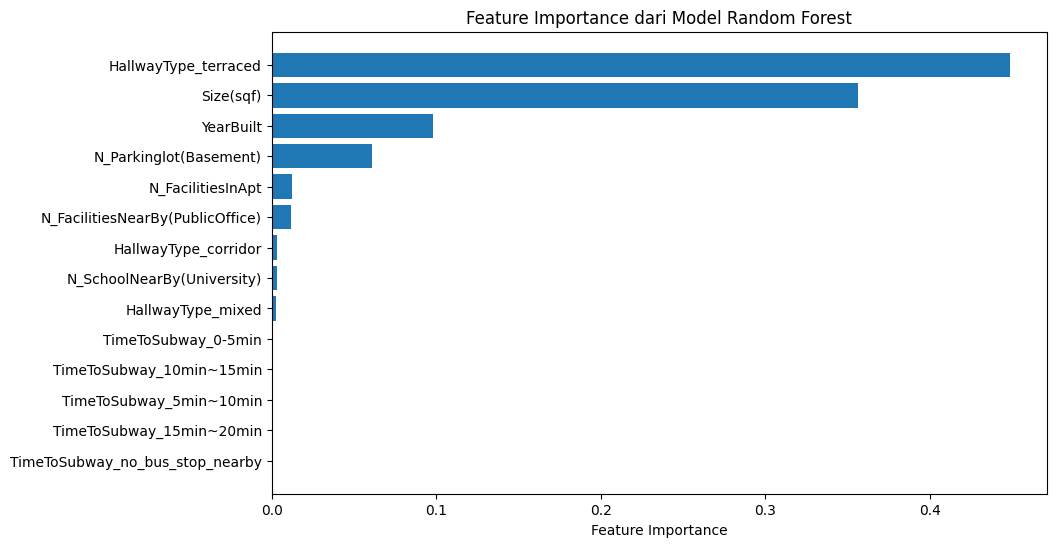

In [150]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance dari Model Random Forest')
plt.gca().invert_yaxis()
plt.show()

### **Conclusion**

Berdasarkan model dengan error terkecil yaitu model Random Forest, kolom fitur yang paling berpengaruh adalah kolom Size(sqf), HallwayType dengan tipe terraced, dan YearBuilt. Fitur-fitur ini memegang peranan penting dalam menentukan harga apartemen. Mengetahui kolom fitur yang paling berpengaruh dapat menjadi acuan dalam menentukan harga yang lebih kompetitif dari unit apartemen tersebut. Fitur tersebut juga dapat membantu pembeli/investor untuk memahami faktor-faktor utama yang mempengaruhi harga apartemen.

Setelah melakukan evaluation matrics, kita sudah mengetahui nilai R-squared, MAE, MSE, dan RMSE berdasarkan beberapa model dan melewati hyperparameter tuning.  Model ini memiliki akurasi yang cukup baik dengan nilai R-squared sekitar 0,848. Artinya model mampu menjelaskan sekitar 84,8% variabilitas harga apartemen. Error terkecil didapatkan 15% kesalahan prediksi. Artinya jika kita menggunakan model ini untuk memperkirakan harga unit apartemen di Daegu, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 15% dari harga seharusnya, yang berarti masih ada ruang untuk perbaikan lebih lanjut. 


### **Recomendation**

Kami ingin memberikan saran apa saja hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi :

- Penambahan fitur yang lebih korelatif dengan target dapat ditambahkan untuk meningkatkan prediksi. 
- pengujian A/B Testing juga dapat dilakukan untuk menguji efektivitas model. 
- Model ini juga perlu untuk dimonitor secara berkala dengan melihat performa dari model ini agar tetap relevan dengan perubahan pasar seperti tren properti atau perubahan ekonomi yang mempengaruhi harga apartemen. 
- Berdasarkan analisis model, fitur yang paling berpengaruh seperti Luas apartemen(Size(sqf)), kamar tipe koridor (HallwayType_terraced), dan tahun dibangun(YearBuilt) sangat mempengaruhi harga apartemen. Pemilik apartemen dapat menggunakan informasi ini untuk menetapkan harga yang lebih kompetitif sesuai dengan fitur ini. 
- Pemilik apartemen juga dapat mengetahui fasilitas dan tipe kamar yang paling berperan penting terhadap harga sehingga dapat ditingkatkan fasilitas tersebut untuk meningkatkan daya tarik dan nilai jual.
- Strategi pemasaran juga dapat difokuskan pada fitur fitur yang paling mempengaruhi harga jual. 



Save Model

In [75]:
#import pickle

In [77]:
# Menyimpan model
#with open('rf.pkl', 'wb') as file:
   # pickle.dump(rf, file)

In [79]:
# Load model
#with open('rf.pkl', 'rb') as file:
#    model_rf = pickle.load(file)